In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 规避极值
参考heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, 
        linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', 
        mask=None, ax=None, **kwargs)

In [ ]:
## 其中robust这个参数：
## If True and ``vmin`` or ``vmax`` are absent, the colormap range is computed with robust quantiles instead of the extreme values

if vmin is None:
  vmin = np.percentile(calc_data,2) if robust else calc_data.min()

if vmin is None:
  vmin = np.percentile(calc_data,98) if robust else calc_data.max()

## 变量-颜色关联

In [ ]:
species = iris.pop("species")
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)

## 添加颜色轴
参考heatmap和clustermap
> LineCollection

> add_collection

> colorbar

(0, 49)

(0, 98)

Text(0.5, 1.0, 'Line Collection with mapped colors')

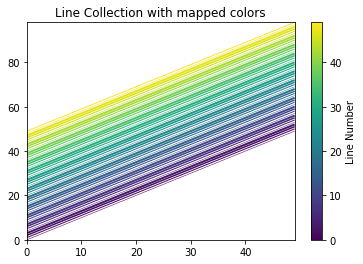

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

N = 50
x = np.arange(N)
ys = [x + i for i in x]

fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))

line_segments = LineCollection([np.column_stack([x, y]) for y in ys],
                               linewidths=(0.5, 1, 1.5, 2),
                               linestyles='solid')
line_segments.set_array(x)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('Line Number')
ax.set_title('Line Collection with mapped colors')
plt.sci(line_segments)  
plt.show()

## 模仿pheatmap 

In [ ]:
width_ratios = self.dim_ratios(self.row_colors,figsize=figsize,axis=1)
height_ratios = self.dim_ratios(self.col_colors,figsize=figsize,axis=0)

nrows = 3 if self.col_colors is None else 4
ncols = 3 if self.row_colors is None else 4

self.gs = gridspec.GridSpec(nrows, ncols, wspace=0.01, hspace=0.01,
                            width_ratios=width_ratios,
                            height_ratios=height_ratios)

self.ax_row_dendrogram = self.fig.add_subplot(self.gs[nrows - 1, 0:2])
self.ax_col_dendrogram = self.fig.add_subplot(self.gs[0:2, ncols - 1])
self.ax_row_dendrogram.set_axis_off()
self.ax_col_dendrogram.set_axis_off()

self.ax_row_colors = None
self.ax_col_colors = None

if self.row_colors is not None:
    self.ax_row_colors = self.fig.add_subplot(self.gs[nrows - 1, ncols - 2])
if self.col_colors is not None:
    self.ax_col_colors = self.fig.add_subplot(self.gs[nrows - 2, ncols - 1])

self.ax_heatmap = self.fig.add_subplot(self.gs[nrows - 1, ncols - 1])

# colorbar for scale to left corner
self.cax = self.fig.add_subplot(self.gs[0, 0])

## 原始数据绘图时标化填色
clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, 
           figsize=None, cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
           row_colors=None, col_colors=None, mask=None, \*\*kwargs)
           
> 数据标化有z_score和standard_scale两种方式(只能选其1，图中每行/列颜色为紫到红)

> 根据源码，0或1和之前的含义不同，指比较变量所在轴（比如index为samples，columns为变量，此时z_score=1）